### Data Collection

In [1]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [2]:
red_wine.shape

(1599, 12)

In [3]:
red_wine.isnull().sum() # no nan values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Get Predictor and Target Variables

In [4]:
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

### Feature Engineering

#### Feature Creation

In [5]:
X['sulfur_dioxide_ratio'] = X['free sulfur dioxide'] / X['total sulfur dioxide']

In [6]:
X['high_alcohol_content'] = X['alcohol'].apply(lambda x: x > 10)

In [7]:
features = [
    'fixed acidity', 'volatile acidity',
    'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density',
    'pH', 'sulphates','alcohol', 'sulfur_dioxide_ratio'
]

### Exploratory Data Analysis

[]

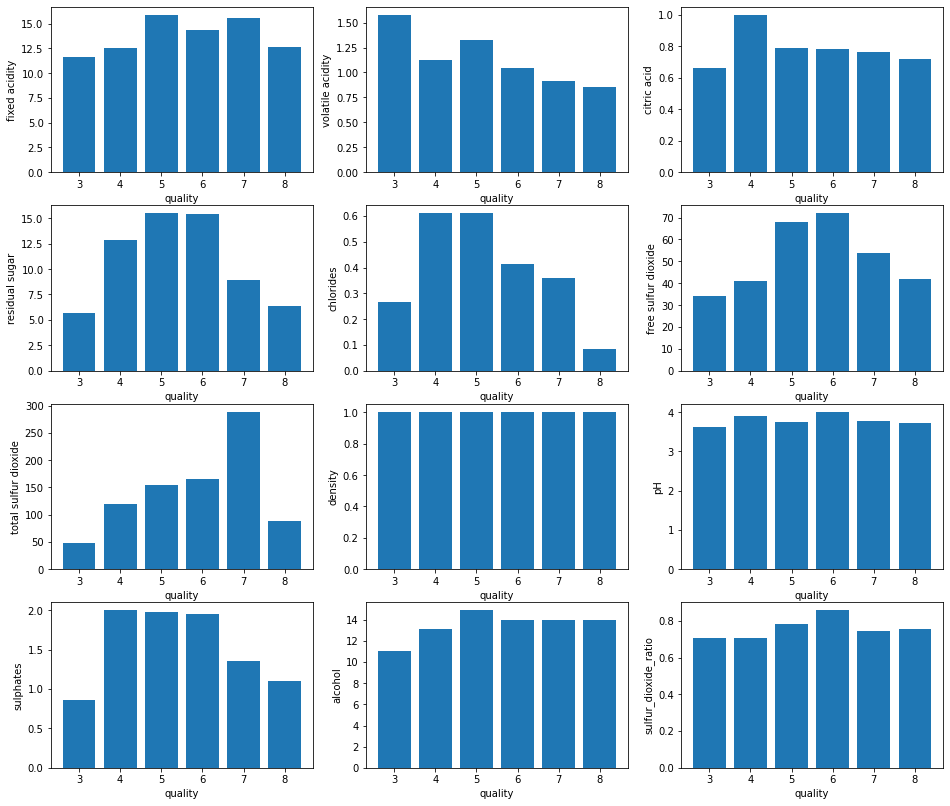

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,14)

fig,axes = plt.subplots(4,3)

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        ax = axes[i][j]
        ax.bar(y, X[features[k]])
        ax.set_xlabel('quality')
        ax.set_ylabel(features[k])
        k += 1
    
plt.plot()

[]

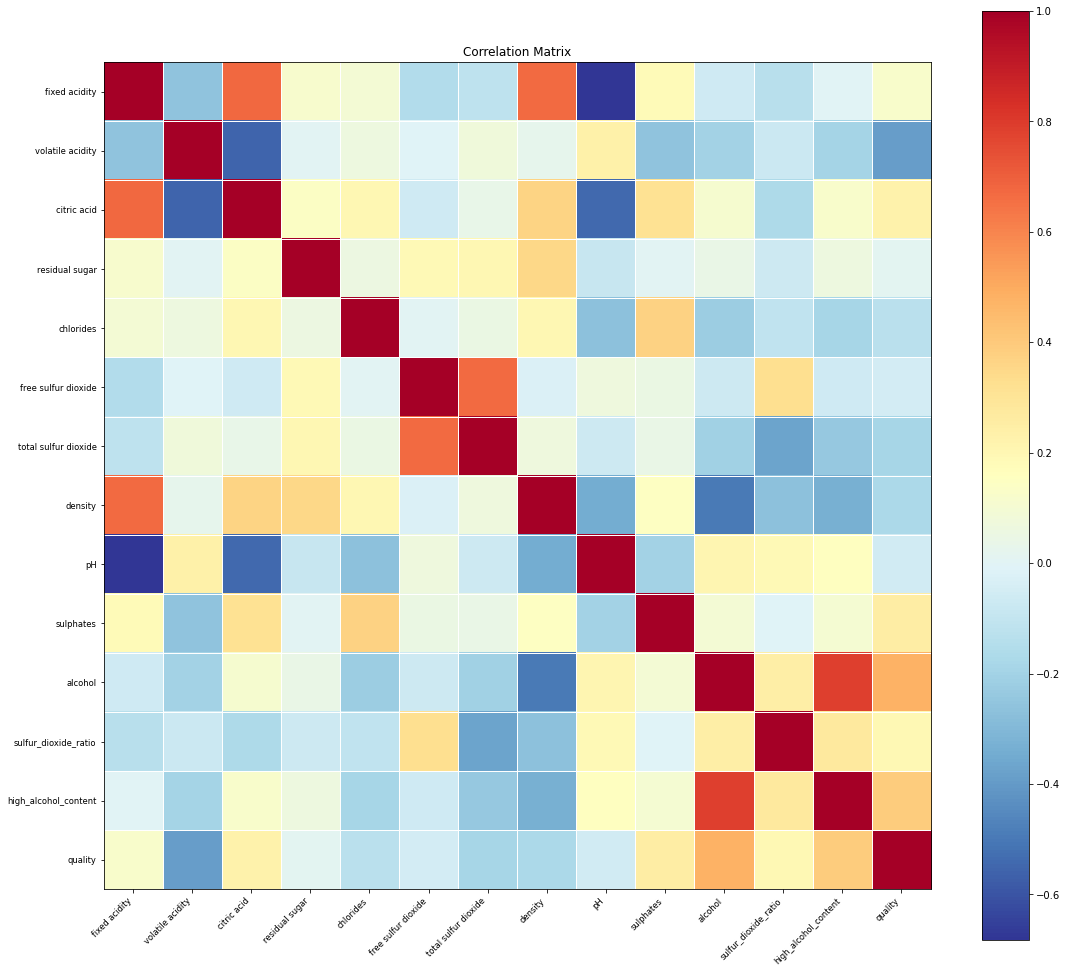

In [9]:
import statsmodels.api as sm

corr_df = X.copy()
corr_df['quality'] = y

corr = corr_df.corr()
sm.graphics.plot_corr(corr, xnames=corr_df.columns)
plt.plot()

### Scaling Data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split Data into Training and Validation Sets

In [11]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=seed)
print('Training Data:', X_train.shape, y_train.shape)
print('Test Data:', X_test.shape, y_test.shape)

Training Data: (1199, 13) (1199,)
Test Data: (400, 13) (400,)


### Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=seed)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [13]:
from sklearn.metrics import accuracy_score
y_pred = forest.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

Accuracy: 74.25%
